- DataSet From Kaggele

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import warnings 

warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Travel.csv')
df.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


Doing EDA 

In [3]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [4]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [5]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [6]:
df['Gender'] = df['Gender'].replace('Fe Male' , 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single' , 'Unmarried')

In [7]:
# df['Gender'].value_counts()
df['MaritalStatus'].value_counts()


MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [8]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [9]:
# Checking Missing Values 

features_with_na = [features for features in df.columns if df[features].isnull().sum() > 0]

for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5),'% missing vlaues')  

Age 4.62357 % missing vlaues
TypeofContact 0.51146 % missing vlaues
DurationOfPitch 5.13502 % missing vlaues
NumberOfFollowups 0.92062 % missing vlaues
PreferredPropertyStar 0.53191 % missing vlaues
NumberOfTrips 2.86416 % missing vlaues
NumberOfChildrenVisiting 1.35025 % missing vlaues
MonthlyIncome 4.76678 % missing vlaues


In [10]:
df[features_with_na]

,Age,TypeofContact,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
0,41.0,Self Enquiry,6.0,3.0,3.0,1.0,0.0,20993.0
1,49.0,Company Invited,14.0,4.0,4.0,2.0,2.0,20130.0
2,37.0,Self Enquiry,8.0,4.0,3.0,7.0,0.0,17090.0
3,33.0,Company Invited,9.0,3.0,3.0,2.0,1.0,17909.0
4,NaN,Self Enquiry,8.0,3.0,4.0,1.0,0.0,18468.0
...,...,...,...,...,...,...,...,...
4883,49.0,Self Enquiry,9.0,5.0,4.0,2.0,1.0,26576.0
4884,28.0,Company Invited,31.0,5.0,3.0,3.0,2.0,21212.0
4885,52.0,Self Enquiry,17.0,4.0,4.0,7.0,3.0,31820.0
4886,19.0,Self Enquiry,16.0,4.0,3.0,3.0,2.0,20289.0


In [11]:
df[features_with_na].select_dtypes(exclude='object').describe()

# Here We have Less Outliers As the Differ between Mean and 50% is not very Big 

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [12]:
# For categorical Mode and For Numerical Columns median Replacement
df.Age.fillna(df.Age.median() , inplace=True)

df.TypeofContact.fillna(df.TypeofContact.mode()[0] , inplace=True)

df.DurationOfPitch.fillna(df.DurationOfPitch.median() , inplace=True)

df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0] , inplace=True)

df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0] , inplace=True)

df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0] , inplace=True)

df.MonthlyIncome.fillna(df.MonthlyIncome.median() , inplace=True)



In [13]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [14]:
df.drop('CustomerID' , inplace = True , axis=1)

- Feature Engineering 

In [15]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [16]:
df['Total Visiting']= df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
 
df.drop(columns=['NumberOfPersonVisiting' , 'NumberOfChildrenVisiting'] , inplace = True , axis = 1)


In [17]:
# Getting all Numeric Features 

num_features = [feature for feature in df.columns if df[feature].dtype != 'object' ]

print(num_features)
print(len(num_features))

['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'Total Visiting']
12


In [18]:
# Getting all Categorical Features 

cat_features = [feature for feature in df.columns if df[feature].dtype == 'object' ]

print(cat_features)
print(len(cat_features))

['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']
6


In [19]:
# Getting all Discrete Features 

disc_features = [feature for feature in df.columns if len(df[feature].unique() ) <= 25 ]

print(disc_features)
print(len(disc_features))

['ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'Designation', 'Total Visiting']
15


In [20]:
# Getting all Continuous Features 

cont_features = [feature for feature in df.columns if feature not in disc_features ]

print(cont_features)
print(len(cont_features))

['Age', 'DurationOfPitch', 'MonthlyIncome']
3


- Handling Categorical Features 

In [21]:
# but we need to split DataSet First 

from sklearn.model_selection import train_test_split

x = df.drop(['ProdTaken']  ,axis = 1)

y = df['ProdTaken'] 

In [22]:
y.value_counts()
x.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Total Visiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [23]:
x_train , x_test ,y_train ,y_test = train_test_split(x,y , test_size= 0.2 , random_state=42)
x_train .shape

(3910, 17)

Handling Columns

In [24]:
# Creating Column Transformers with 3 types of Transformers
cat_features = x.select_dtypes( include= 'object').columns

num_features = x.select_dtypes( exclude= 'object').columns

from sklearn.preprocessing import OneHotEncoder , StandardScaler

# For handling Multiple Transformers like OneHotEncoder , StandardScaler We Use ColumnTransformer

from sklearn.compose import ColumnTransformer

numeric_teansformers = StandardScaler()
oh_transformers = OneHotEncoder(drop = "first")

preprocessor = ColumnTransformer(
[
    ('OneHotEncoder' , oh_transformers ,cat_features),
    ('StandardScaler',numeric_teansformers,num_features)
]

)

In [25]:
print(preprocessor)

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'Total Visiting'],
      dtype='object'))])


In [26]:
# Apllying Tranformation On training DataSet
x_train = preprocessor.fit_transform(x_train)

In [27]:
# pd.DataFrame(x_train)

In [28]:
x_test = preprocessor.transform(x_test)

Random Forest Classifier Training

In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

Efficient Way Of Training THe Model

In [39]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    " AdaBoost Classifierr" : AdaBoostClassifier(),  
    "GradientBoosting Classifier" : GradientBoostingClassifier()
}
# LOop To iterat over all the Respective Modles
for i in range(len(list(models))):
    model = list(models.values())[i]# Iterating over models
    model.fit(x_train , y_train)
    # Make Predictions 
    y_train_pred  = model.predict(x_train)
    y_test_pred  = model.predict(x_test)


    acc_score = accuracy_score(y_train,y_train_pred)
    f1 = f1_score(y_train,y_train_pred , average='weighted')
    pr = precision_score(y_train,y_train_pred)
    rs = recall_score(y_train,y_train_pred)
    ras = roc_auc_score(y_train,y_train_pred)


    acc_score1 = accuracy_score(y_test,y_test_pred)
    f11= f1_score(y_test,y_test_pred , average='weighted')
    pr1 = precision_score(y_test,y_test_pred)
    rs1 = recall_score(y_test,y_test_pred)
    ras1 = roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])
    # Trainig Set Performance 
    print('Trainig Set Performance ')

    print('accuracy_score {:.4f}'.format(acc_score))
    print('f1_score {:.4f}'.format(f1))
    print('precision_score{:.4f}'.format(pr))
    print('recall_score{:.4f}'.format(rs))
    print('roc_auc_score{:.4f}'.format(ras))

    print('--------------------------')
    # Test Set Performance 
    print('Test Set Performance ')



    print('accuracy_score{:.4f}'.format(acc_score1))
    print('f1_score{:.4f}'.format(f11))
    print('precision_score{:.4f}'.format(pr1))
    print('recall_score{:.4f}'.format(rs1))
    print('roc_auc_score{:.4f}'.format(ras1))

    print('='*35)
    print('\n')


Decision Tree
Trainig Set Performance 
accuracy_score 1.0000
f1_score 1.0000
precision_score1.0000
recall_score1.0000
roc_auc_score1.0000
--------------------------
Test Set Performance 
accuracy_score0.9151
f1_score0.9150
precision_score0.7842
recall_score0.7801
roc_auc_score0.8640


 AdaBoost Classifierr
Trainig Set Performance 
accuracy_score 0.8565
f1_score 0.8365
precision_score0.7308
recall_score0.3649
roc_auc_score0.6670
--------------------------
Test Set Performance 
accuracy_score0.8354
f1_score0.8115
precision_score0.6630
recall_score0.3194
roc_auc_score0.6400


GradientBoosting Classifier
Trainig Set Performance 
accuracy_score 0.8939
f1_score 0.8819
precision_score0.8756
recall_score0.5021
roc_auc_score0.7429
--------------------------
Test Set Performance 
accuracy_score0.8589
f1_score0.8398
precision_score0.7732
recall_score0.3927
roc_auc_score0.6824




As Model Accuracy of RANDOM FOREST IS HIGH SO DOING HYPERPARAMETER TUNING OF RANDOM FOREST

In [40]:
# Hyperparameter grid
gradient_param = {
    'n_estimators': [50, 100, 150],          # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],      # Learning rate shrinks contribution of each tree
    'max_depth': [3, 4, 5],                 # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum samples required to be at a leaf node
    'subsample': [0.8, 1.0]                 # Fraction of samples used for fitting the individual base learners
}


In [41]:
# Modle List pf Hyperparameter Tuning
randomcv_models = [
    ("GB" , GradientBoostingClassifier() , gradient_param)
]

In [42]:
randomcv_models

[('GB',
  GradientBoostingClassifier(),
  {'n_estimators': [50, 100, 150],
   'learning_rate': [0.01, 0.1, 0.2],
   'max_depth': [3, 4, 5],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4],
   'subsample': [0.8, 1.0]})]

In [43]:
from sklearn.model_selection import RandomizedSearchCV 

model_params ={}



# Iterate over the models and perform RandomizedSearchCV
for name, model, rf_params in randomcv_models:
    print(f"Tuning hyperparameters for {name}...")
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=rf_params,
        n_iter=50,  # Number of random combinations to try
        cv=3,  # 5-fold cross-validation
        scoring='accuracy',  # Metric for evaluation
        verbose=2,
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(x_train, y_train)  # Train the model

    # Save the best model and its parameters
    rf_params[name] = {
        'best_model': random_search.best_estimator_,
        'best_params': random_search.best_params_,
        'best_score': random_search.best_score_
    }
    print(f"Best Parameters for {name}: {random_search.best_params_}")
    print(f"Best Cross-Validation Score for {name}: {random_search.best_score_}")

# Evaluate the best models on the test set
print("\n--- Final Test Set Performance ---")
for name in model_params:
    best_model = model_params[name]['best_model']
    y_test_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"{name}: Test Set Accuracy = {accuracy:.4f}")




Tuning hyperparameters for GB...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters for GB: {'subsample': 0.8, 'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.2}
Best Cross-Validation Score for GB: 0.9179028132992327

--- Final Test Set Performance ---


Again training the Model with Tuned VALUES 

In [44]:
# Define models dictionary with proper RandomForestClassifier initialization
models = {  
    "GradientBoosting Classifier" : GradientBoostingClassifier(
        subsample = 0.8, n_estimators = 150, min_samples_split=10, min_samples_leaf=1, max_depth= 5, learning_rate= 0.2

    )
}
# LOop To iterat over all the Respective Modles
for i in range(len(list(models))):
    model = list(models.values())[i]# Iterating over models
    model.fit(x_train , y_train)
    # Make Predictions 
    y_train_pred  = model.predict(x_train)
    y_test_pred  = model.predict(x_test)


    acc_score = accuracy_score(y_train,y_train_pred)
    f1 = f1_score(y_train,y_train_pred , average='weighted')
    pr = precision_score(y_train,y_train_pred)
    rs = recall_score(y_train,y_train_pred)
    ras = roc_auc_score(y_train,y_train_pred)


    acc_score1 = accuracy_score(y_test,y_test_pred)
    f11= f1_score(y_test,y_test_pred , average='weighted')
    pr1 = precision_score(y_test,y_test_pred)
    rs1 = recall_score(y_test,y_test_pred)
    ras1 = roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])
    # Trainig Set Performance 
    print('Trainig Set Performance ')

    print('accuracy_score {:.4f}'.format(acc_score))
    print('f1_score {:.4f}'.format(f1))
    print('precision_score{:.4f}'.format(pr))
    print('recall_score{:.4f}'.format(rs))
    print('roc_auc_score{:.4f}'.format(ras))

    print('--------------------------')
    # Test Set Performance 
    print('Test Set Performance ')



    print('accuracy_score{:.4f}'.format(acc_score1))
    print('f1_score{:.4f}'.format(f11))
    print('precision_score{:.4f}'.format(pr1))
    print('recall_score{:.4f}'.format(rs1))
    print('roc_auc_score{:.4f}'.format(ras1))

    print('='*35)
    print('\n')

GradientBoosting Classifier
Trainig Set Performance 
accuracy_score 0.9992
f1_score 0.9992
precision_score1.0000
recall_score0.9959
roc_auc_score0.9979
--------------------------
Test Set Performance 
accuracy_score0.9356
f1_score0.9329
precision_score0.9156
recall_score0.7382
roc_auc_score0.8609




Plotting ROC and AUC(area uder the curve)
- When Should You Use It?
Binary classification: The ROC curve helps visualize the trade-off between true positives and false positives at various thresholds.
Multi-class classification: It provides insights into how well the model distinguishes each class.
Imbalanced datasets: AUC can indicate whether the model has learned to detect the minority class effectively.

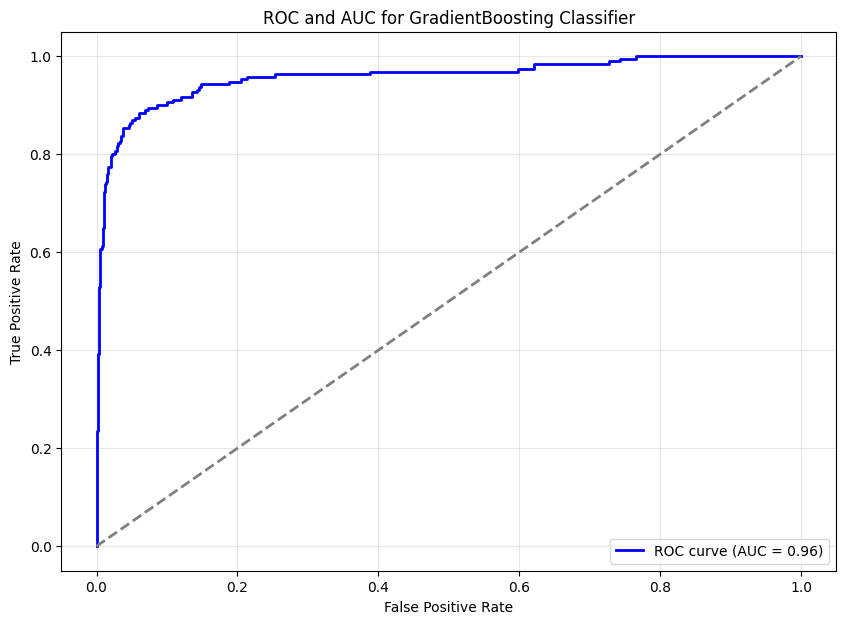

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming y_train and y_test contain class labels
# For multi-class problems, binarize the labels
if len(set(y_train)) > 2:  # Multi-class classification
    y_train_bin = label_binarize(y_train, classes=list(set(y_train)))
    y_test_bin = label_binarize(y_test, classes=list(set(y_test)))
    n_classes = y_train_bin.shape[1]
else:  # Binary classification
    y_train_bin = y_train
    y_test_bin = y_test

for model_name, model in models.items():
    # Fit the model
    model.fit(x_train, y_train)

    # Predict probabilities for ROC curve
    y_score = model.predict_proba(x_test)

    if len(set(y_train)) > 2:  # Multi-class ROC and AUC
        fpr = {}
        tpr = {}
        roc_auc = {}
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curve for each class
        plt.figure(figsize=(10, 7))
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], lw=2, label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

        # Micro-average ROC curve
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        plt.plot(fpr["micro"], tpr["micro"], linestyle='--', color='deeppink', lw=2, label=f"Micro-average ROC (AUC = {roc_auc['micro']:.2f})")
    else:  # Binary ROC and AUC
        fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])  # Use probabilities for positive class
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")

    # Plot settings
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=2)  # Random chance line
    plt.title(f"ROC and AUC for {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()


Result of Above 

This plot shows the **ROC curve** and **AUC** for the Random Forest model. Here's how to interpret it:

1. **True Positive Rate (TPR)**: Also known as recall or sensitivity, it measures how well the model identifies positive instances.
2. **False Positive Rate (FPR)**: Measures how many negative instances are incorrectly classified as positive.
3. **AUC (Area Under the Curve)**: The AUC value of **0.98** indicates that the model is performing very well, with a high ability to distinguish between classes. The closer the AUC is to 1, the better the model is.

The diagonal gray dashed line represents a random classifier (i.e., one that cannot distinguish between the classes). The Random Forest model's curve is far above this line, indicating good performance.